# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

4.4.1


In [3]:
import plotly.graph_objs as go 
init_notebook_mode(connected=True) 

** Read in the csv file as a dataframe called df **

In [5]:
df = pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


** Check the info() of the df **

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [7]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [13]:
df['zip'].value_counts().iloc[:5]

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [16]:
df['twp'].value_counts().iloc[:5]

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [19]:
len(df['title'].unique())

110

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [20]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [24]:
df['Reason'] = df['title'].apply(lambda x:x.split(':')[0])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


** What is the most common Reason for a 911 call based off of this new column? **

In [25]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

In [26]:
import seaborn as sns

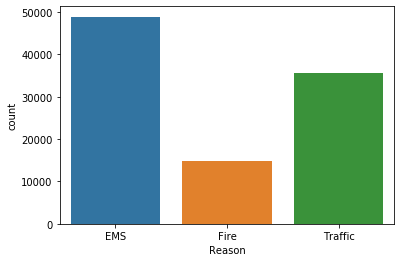

In [27]:
sns.countplot(x='Reason', data=df)

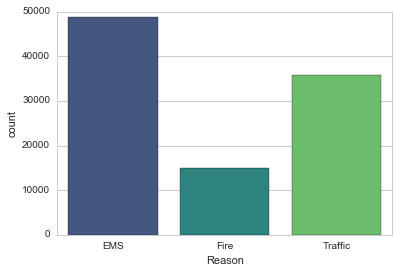

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [35]:
type(df['timeStamp'].iloc[0])

str

str

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [39]:
time = pd.to_datetime(df['timeStamp'].iloc[0])
time

Timestamp('2015-12-10 17:40:00')

In [40]:
time.day,time.month,time.dayofweek

(10, 12, 3)

In [51]:
time.day_name

<bound method Timestamp.day_name of Timestamp('2015-12-10 17:40:00')>

In [43]:
time_values = df['timeStamp'].map(pd.to_datetime)
time_day = time_values.apply(lambda x:x.day)
time_month = time_values.apply(lambda x:x.month)
time_dayofweek = time_values.apply(lambda x:x.dayofweek)

In [80]:
time_weekofyear = time_values.apply(lambda x:x.weekofyear)
time_weekofyear

0        50
1        50
2        50
3        50
4        50
         ..
99487    34
99488    34
99489    34
99490    34
99491    34
Name: timeStamp, Length: 99492, dtype: int64

In [170]:
time_hour = time_values.apply(lambda x:x.hour)
time_hour

0        17
1        17
2        17
3        17
4        17
         ..
99487    11
99488    11
99489    11
99490    11
99491    11
Name: timeStamp, Length: 99492, dtype: int64

In [47]:
list(zip(time_day,time_month,time_dayofweek))[:10]

[(10, 12, 3),
 (10, 12, 3),
 (10, 12, 3),
 (10, 12, 3),
 (10, 12, 3),
 (10, 12, 3),
 (10, 12, 3),
 (10, 12, 3),
 (10, 12, 3),
 (10, 12, 3)]

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [54]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [56]:
time_of_day_text = time_dayofweek.map(lambda x:dmap[x])
time_of_day_text

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: timeStamp, Length: 99492, dtype: object

In [57]:
df['time_of_day_text'] = time_of_day_text
df['time_day'] = time_day
df['time_month'] = time_month
df['time_dayofweek'] = time_dayofweek

In [81]:
df['time_weekofyear'] = time_weekofyear

In [129]:
df['time_values'] = time_values

In [171]:
df['time_hour'] = time_hour

In [172]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,time_of_day_text,time_day,time_month,time_dayofweek,time_weekofyear,time_values,Date,time_hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,Thu,10,12,3,50,2015-12-10 17:40:00,2015-12-10,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,Thu,10,12,3,50,2015-12-10 17:40:00,2015-12-10,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,Thu,10,12,3,50,2015-12-10 17:40:00,2015-12-10,17
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,Thu,10,12,3,50,2015-12-10 17:40:01,2015-12-10,17
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,Thu,10,12,3,50,2015-12-10 17:40:01,2015-12-10,17


** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

In [61]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


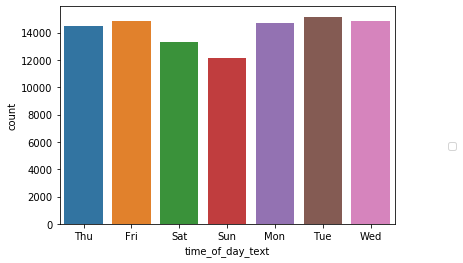

In [75]:
sns.countplot(x='time_of_day_text', data=df)
plt.legend(loc='best', bbox_to_anchor=(1, 0.2, 0.2, 0.2))

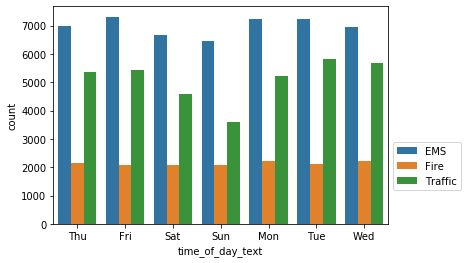

In [74]:
sns.countplot(x='time_of_day_text', data=df, hue='Reason')
plt.legend(loc='best', bbox_to_anchor=(1, 0.2, 0.2, 0.2))

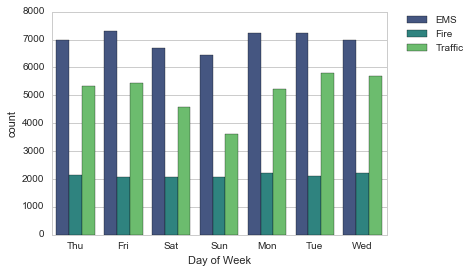

**Now do the same for Month:**

No handles with labels found to put in legend.


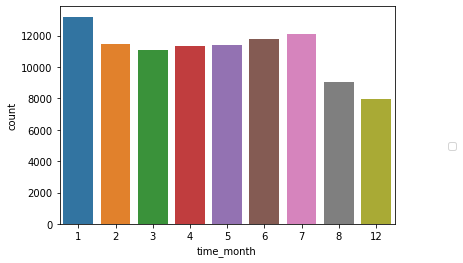

In [78]:
sns.countplot(x='time_month', data=df)
plt.legend(loc='best', bbox_to_anchor=(1, 0.2, 0.2, 0.2))

In [85]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'Reason', 'time_of_day_text', 'time_day', 'time_month',
       'time_dayofweek', 'time_weekofyear'],
      dtype='object')

No handles with labels found to put in legend.


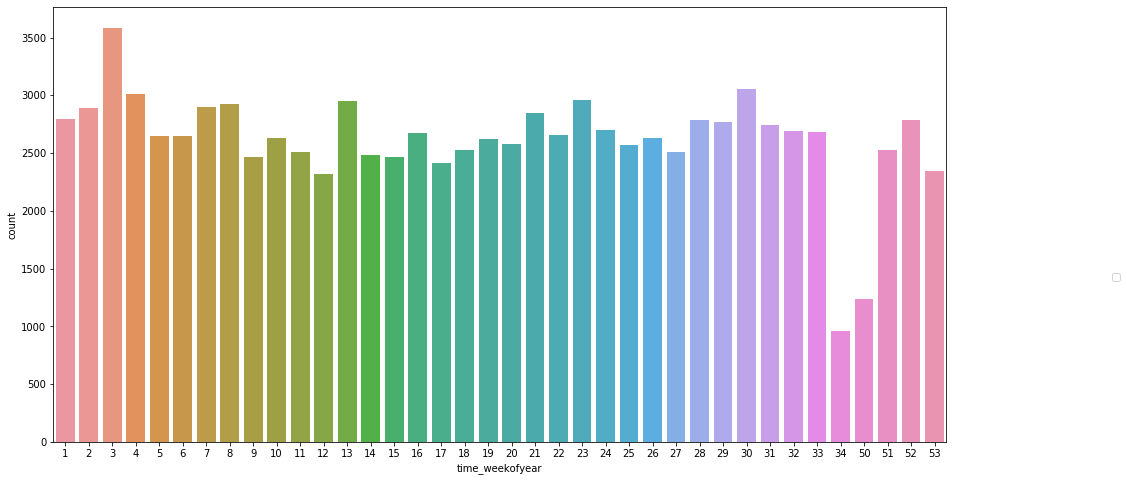

In [91]:
plt.figure(figsize=(16,8))
sns.countplot(x='time_weekofyear', data=df)
plt.legend(loc='best', bbox_to_anchor=(1, 0.2, 0.2, 0.2))

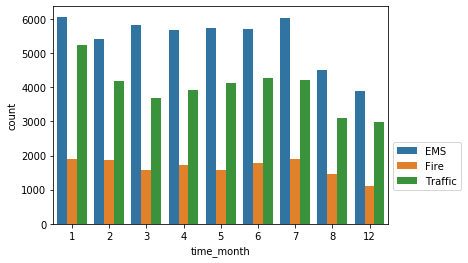

In [77]:
sns.countplot(x='time_month', data=df, hue='Reason')
plt.legend(loc='best', bbox_to_anchor=(1, 0.2, 0.2, 0.2))

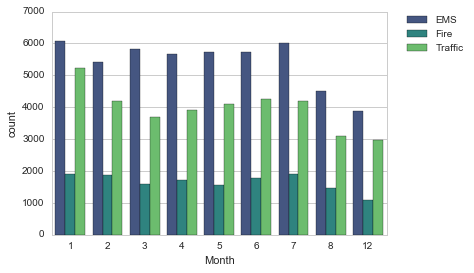

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [92]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'Reason', 'time_of_day_text', 'time_day', 'time_month',
       'time_dayofweek', 'time_weekofyear'],
      dtype='object')

In [97]:
byMonth = df.groupby('time_month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,time_of_day_text,time_day,time_dayofweek,time_weekofyear
time_month,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


In [99]:
byMonth.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'Reason', 'time_of_day_text', 'time_day', 'time_dayofweek',
       'time_weekofyear'],
      dtype='object')

** Now create a simple plot off of the dataframe indicating the count of calls per month. **

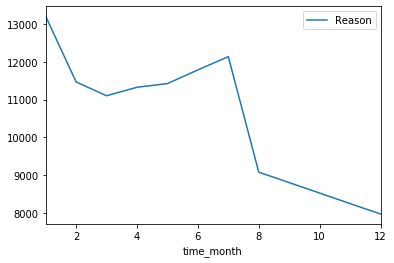

In [103]:
byMonth.plot(y='Reason')

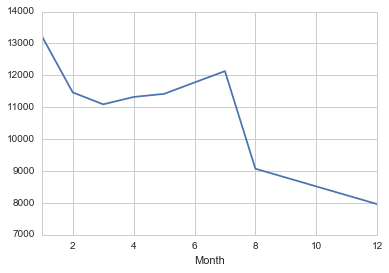

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

In [106]:
byMonth.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'Reason', 'time_of_day_text', 'time_day', 'time_dayofweek',
       'time_weekofyear'],
      dtype='object')

In [114]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,time_of_day_text,time_day,time_dayofweek,time_weekofyear
time_month,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969,7969


In [120]:
byMonth.reset_index()

,time_month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,time_of_day_text,time_day,time_dayofweek,time_weekofyear
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969,7969


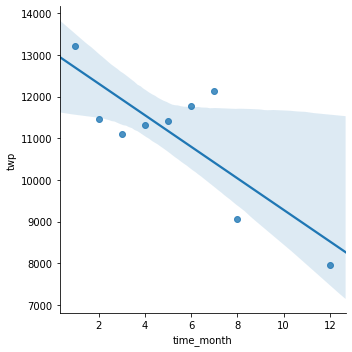

In [123]:
sns.lmplot( x='time_month', y='twp', data=byMonth.reset_index())

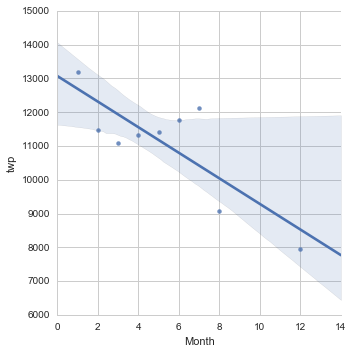

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [132]:
df['Date'] = df['time_values'].map(lambda x:x.date())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,time_of_day_text,time_day,time_month,time_dayofweek,time_weekofyear,time_values,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,Thu,10,12,3,50,2015-12-10 17:40:00,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,Thu,10,12,3,50,2015-12-10 17:40:00,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,Thu,10,12,3,50,2015-12-10 17:40:00,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,Thu,10,12,3,50,2015-12-10 17:40:01,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,Thu,10,12,3,50,2015-12-10 17:40:01,2015-12-10


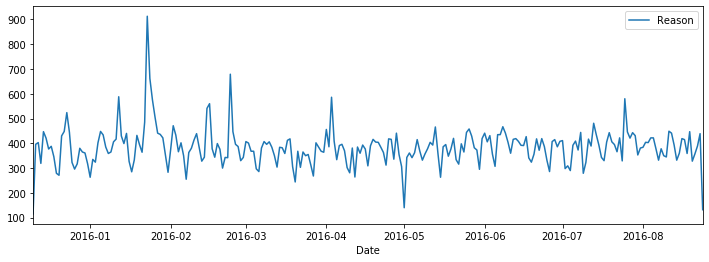

In [143]:
df.groupby('Date').count().reset_index().plot(x='Date',y='Reason',figsize=(12,4))

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

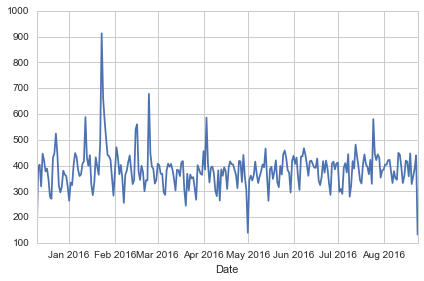

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

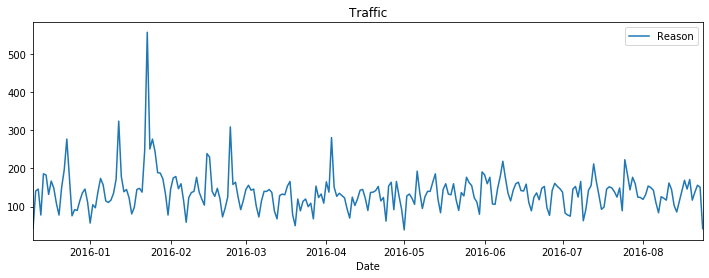

In [146]:
df[df['Reason']=='Traffic'].groupby('Date').count().reset_index().plot(x='Date',y='Reason',figsize=(12,4),title='Traffic')

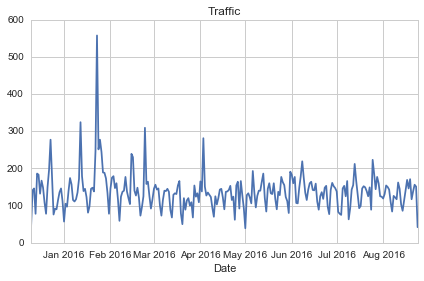

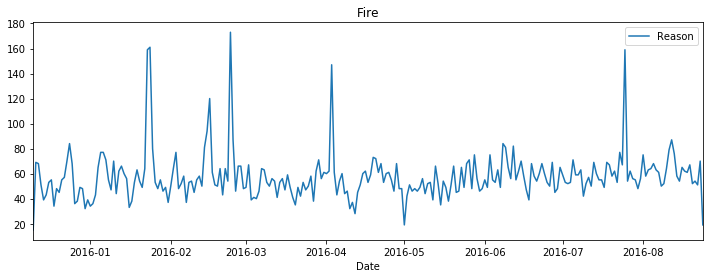

In [148]:
df[df['Reason']=='Fire'].groupby('Date').count().reset_index().plot(x='Date',y='Reason',figsize=(12,4),title='Fire')

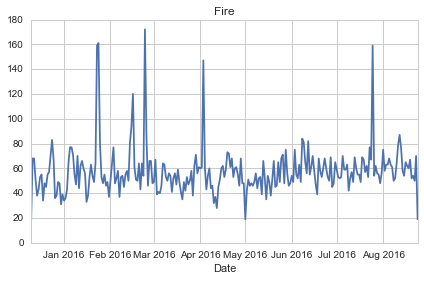

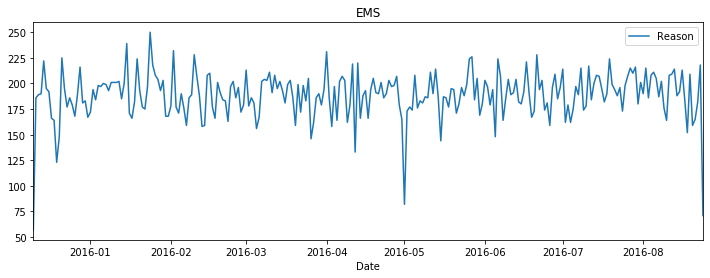

In [147]:
df[df['Reason']=='EMS'].groupby('Date').count().reset_index().plot(x='Date',y='Reason',figsize=(12,4),title='EMS')

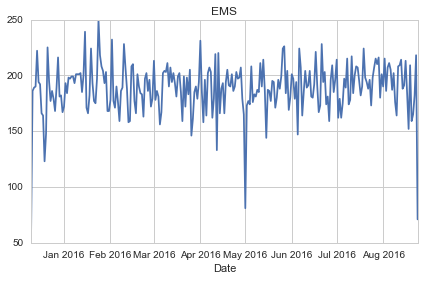

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [149]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'Reason', 'time_of_day_text', 'time_day', 'time_month',
       'time_dayofweek', 'time_weekofyear', 'time_values', 'Date'],
      dtype='object')

In [159]:
df['time_of_day_text']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: time_of_day_text, Length: 99492, dtype: object

In [168]:
df['time_of_day_text'].unique

array(['Thu', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed'], dtype=object)

In [183]:
temp = df[['time_of_day_text','time_hour']]
temp

,time_of_day_text,time_hour
0,Thu,17
1,Thu,17
2,Thu,17
3,Thu,17
4,Thu,17
...,...,...
99487,Wed,11
99488,Wed,11
99489,Wed,11
99490,Wed,11


In [193]:
df_hm = temp.pivot_table(index='time_of_day_text',columns='time_hour', aggfunc=np.count_nonzero)
df_hm.head()

time_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
time_of_day_text,,,,,,,,,,,,,,,,,,,,,
Fri,275,470,382,350,402,388,744,1196,1484,1504,...,1864,1960,2078,1960,1640,1392,1334,1118,1028,948
Mon,282,442,402,388,408,534,794,1306,1638,1572,...,1738,1826,1978,1994,1770,1492,1226,994,944,650
Sat,375,602,526,520,448,462,514,782,918,1280,...,1578,1592,1696,1514,1556,1392,1256,1144,1012,934
Sun,383,612,572,536,484,480,600,804,966,1240,...,1368,1382,1326,1428,1340,1310,1074,922,830,660
Thu,278,404,466,318,364,406,724,1140,1554,1656,...,1752,1938,1870,2026,1620,1396,1234,1106,848,708


Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Now create a HeatMap using this new DataFrame. **

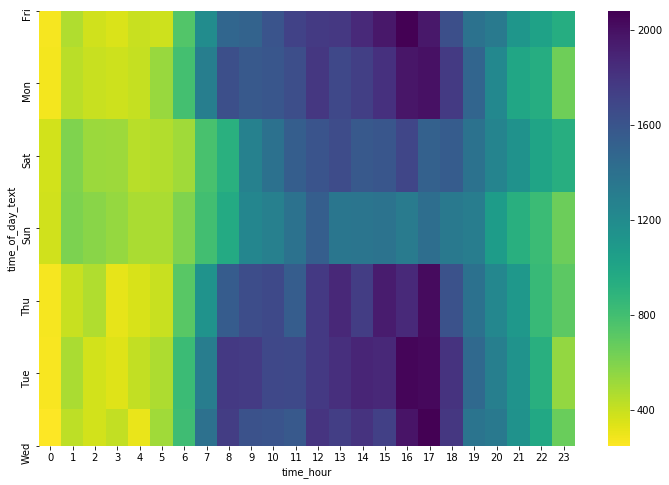

In [197]:
plt.figure(figsize=(12,8))
sns.heatmap(df_hm,cmap='viridis_r')

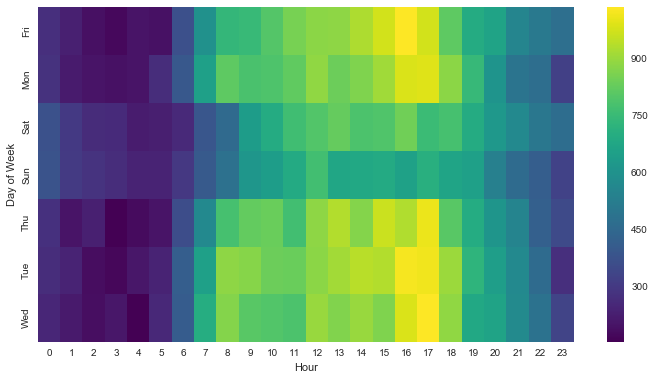

** Now create a clustermap using this DataFrame. **

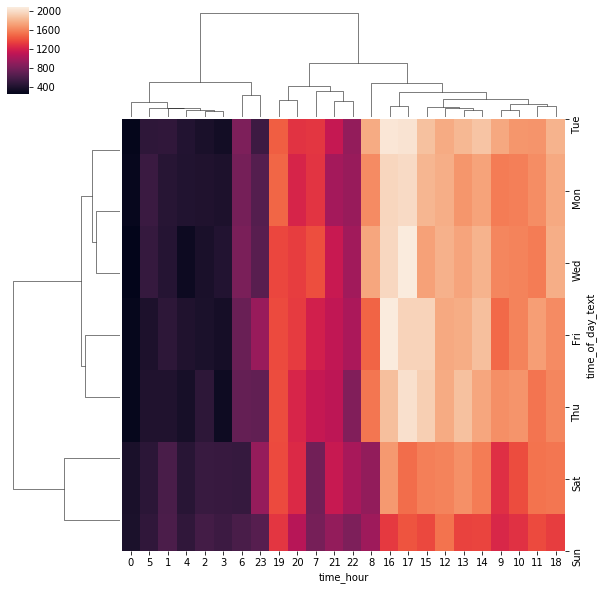

In [198]:
sns.clustermap(df_hm)

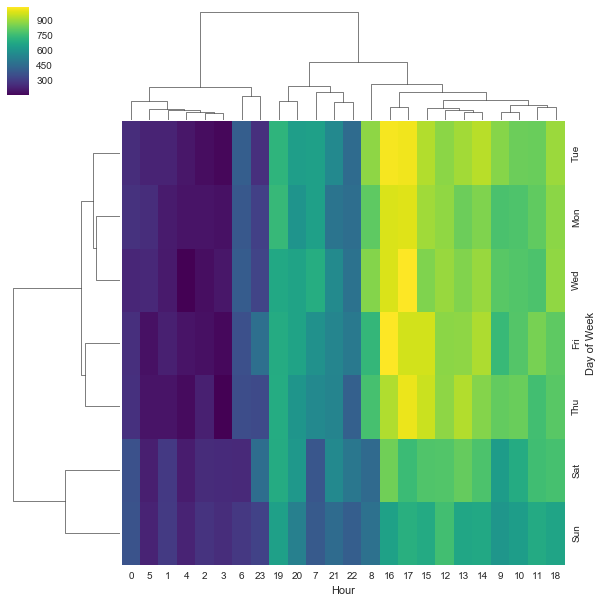

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [199]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'Reason', 'time_of_day_text', 'time_day', 'time_month',
       'time_dayofweek', 'time_weekofyear', 'time_values', 'Date',
       'time_hour'],
      dtype='object')

In [211]:
df_hm = df.groupby(['time_of_day_text','time_month']).count()['Reason'].unstack()
df_hm.head()

time_month,1,2,3,4,5,6,7,8,12
time_of_day_text,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


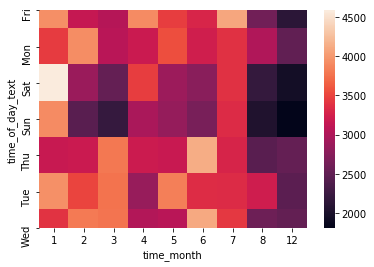

In [201]:
sns.heatmap(df_hm)

In [207]:
df_hm = df.groupby(['time_of_day_text','time_month']).count()['Reason'].unstack()

In [208]:
sns.heat_map(df_m)

AttributeError: module 'seaborn' has no attribute 'heat_map'

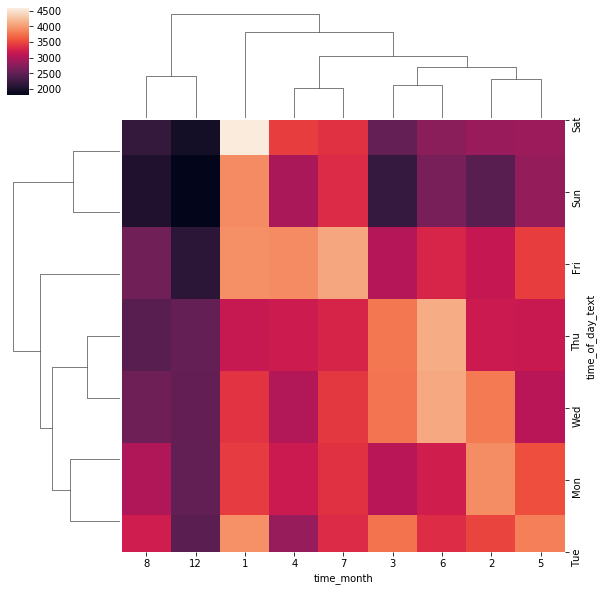

In [202]:
sns.clustermap(df_hm)

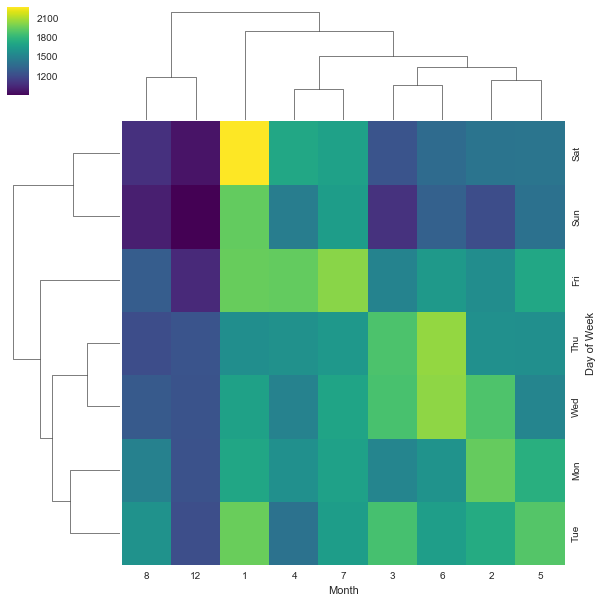

**Continue exploring the Data however you see fit!**
# Great Job!